# Diving into the Stength of Concrete 

In the world of of construction sturdy and strong material are essential for safety and strength. We realize that concrete is the most important material for building from commecial to residental. Concrete's compressive strength relies on the various testing methods and ingredents. If the quality of concrete is poor then the building cannot be stable which leads to major issues. However, when we use the best quality concrete materal and testing that endures and it is safe. Now we have maximized the greatest use for God-natural, and man-made ingredients.
There are seven different ways to test concrete stength. The first is Rebound Hammer, Penetration Resistance Test, Ultrasonic Pulse Velocity, Wireless Maturity Sensors, Drilled Core, Pullout Test and Cast-in-place Cylinders. All tests consists of pros and cons depending on the quality of testing methods, project deadline, dificualty of tests, and sample requirement for accurate testing.

## Hypothesis: Out of all variables used to create concrete Age, cement, and superplasticizer are the most important ingredients to increase concrete's strength.

 ## Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 qualitative output variable
Missing Attribute Values: None

## Features Defination:

Cement  is one of the most important building material, is a binding agent that sets and hardens to adhere to building units such as stones, bricks, tiles.


Blast furnace slag is a non-metallic residue usually obtained from steel plants or from the reduction of ores in a blast furnace. It is used as a mud cake modifier for the cementing of oil and gas wells

Fly Ash is the finely divided residue that results from the combustion of pulverized coal and is transported from the combustion chamber by exhaust gases

Superplasticizer also known as high range water reducers, are additives used in making high strength


Coarse Aggregate is stone which are broken into small sizes and irregular in shape. In construction work the aggregate are used such as limestone and granite or river aggregate.


Fine aggregate is basically any normal sand particle that comes from the land through the mining process

Age the amount of days 

Concrete compressive strength is measured in megapascal(mPa) which is a pressure measurement unit. 


Resources:
https://stackoverflow.com/

https://archive.ics.uci.edu/ml/index.php

https://www.forconstructionpros.com/

https://civiconcepts.com/blog/coarse-aggregate


# The Flow of this project:

1. Hypothesis

2. Data Exploration & Visualization

3. Holdout(splitting data)

4) models training using hypertuning 

5) models testing 

6) models accuracy 


# Models:

Linear Regression

Decision Tree

RandomnSearchCV 

Random forest

Gradient Boost

Support Vector Regressor

In [1]:
# import libaries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", color_codes=True)

In [2]:
# read in the dataset
df = pd.read_excel("Concrete_Data.xls")

In [3]:
# view the first 9 rows
df.head(9)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291


In [4]:
# In our information below we notice all of our data types are floats(decimals) except age is intger(whole number)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

(1030, 9)

In [5]:
# Changing column names to make easier to process and comprehend
df.columns = ['Cement', 'Blast_Furnance', 'Fly_Ash', 'Water', "Super_plast", "Coarse_Agg", "Fine_Agg", "Age", "Concrete_Strength"]

In [6]:
# Taking a second look at our data names to make sure they were changed properly.
df.head()

,Cement,Blast_Furnance,Fly_Ash,Water,Super_plast,Coarse_Agg,Fine_Agg,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Does this data have any null values?

In [7]:
# We do not see any null values, if there were we would see True, insted we only see False
df.isnull()

,Cement,Blast_Furnance,Fly_Ash,Water,Super_plast,Coarse_Agg,Fine_Agg,Age,Concrete_Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [8]:
# checking for any null values
df.isna().sum()

Cement               0
Blast_Furnance       0
Fly_Ash              0
Water                0
Super_plast          0
Coarse_Agg           0
Fine_Agg             0
Age                  0
Concrete_Strength    0
dtype: int64

## Descriptive Statistics

This gives us the descriptive stats(mean, median, mode, percentiles, min, max and standard deviation) and count of the columns 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast_Furnance,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly_Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Super_plast,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse_Agg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine_Agg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete_Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


Strength of concrete is generally tested after 28 days as concrete cube strength or compressive strength. The reason for testing concrete strength after 28 days Why do we test concrete compressive strength after 28 days? Concrete gains strength with time after casting. The rate of gain of concrete compressive strength in higher during the first 28 days of casting. At about 80mpa 

## Univariate Analysis

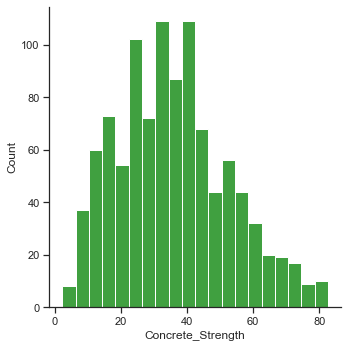

In [10]:
# Checking distribution of our target variable and it also looks normal.
sns.displot(df, x="Concrete_Strength", bins=20, color="green")

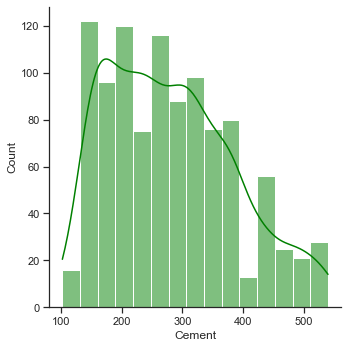

In [11]:
# Plot the histogram thanks to the distplot function
sns.displot(data=df, x="Cement", kde=True, color="green")

## Multivariate Analysis

# What is the distribution of each feature and what's the relationship to concrete strength?

In our distribution plot below we display all nine features to see if they are normally distributed. So far Cement, water, Course_Aggregate, Fine_Aggergate and Concrete Strength seems to look like that bell shape we want in our normal distirbutions. The rest of the variables do not look normal.

In [12]:
# to remove any white spaces within our columns
df.columns = df.columns.str.replace(' ', '')

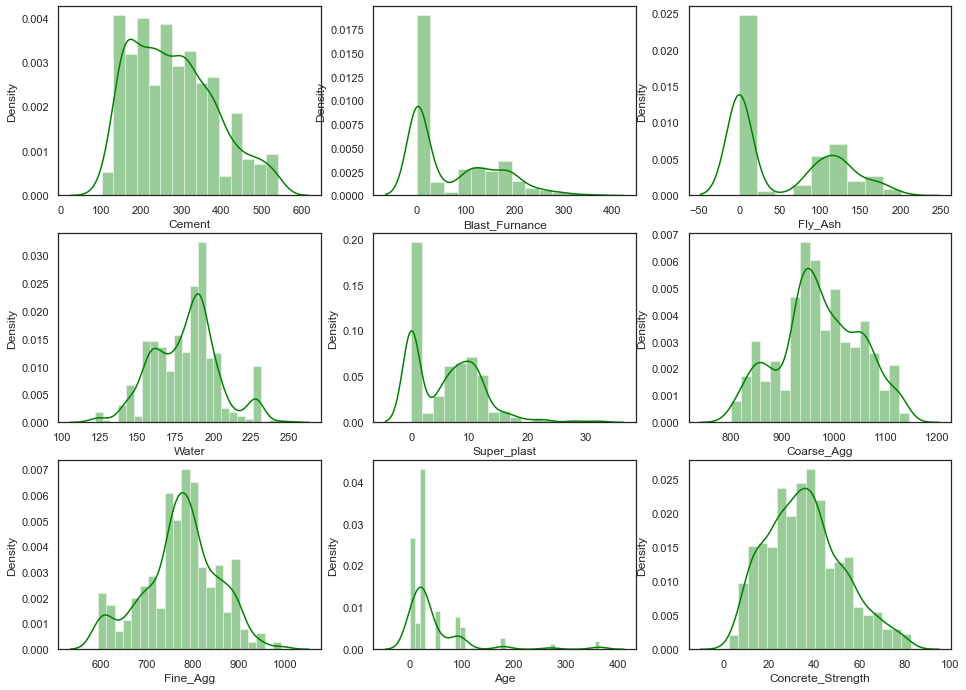

In [13]:
# plotting histogram and distribution 
sns.set(style="white") 
plt.figure(figsize = (16 , 16))
for variable in range(9):
    plt.subplot(4, 3, variable + 1)
    sns.distplot(df[list(df)[variable]], color="green")
plt.show()

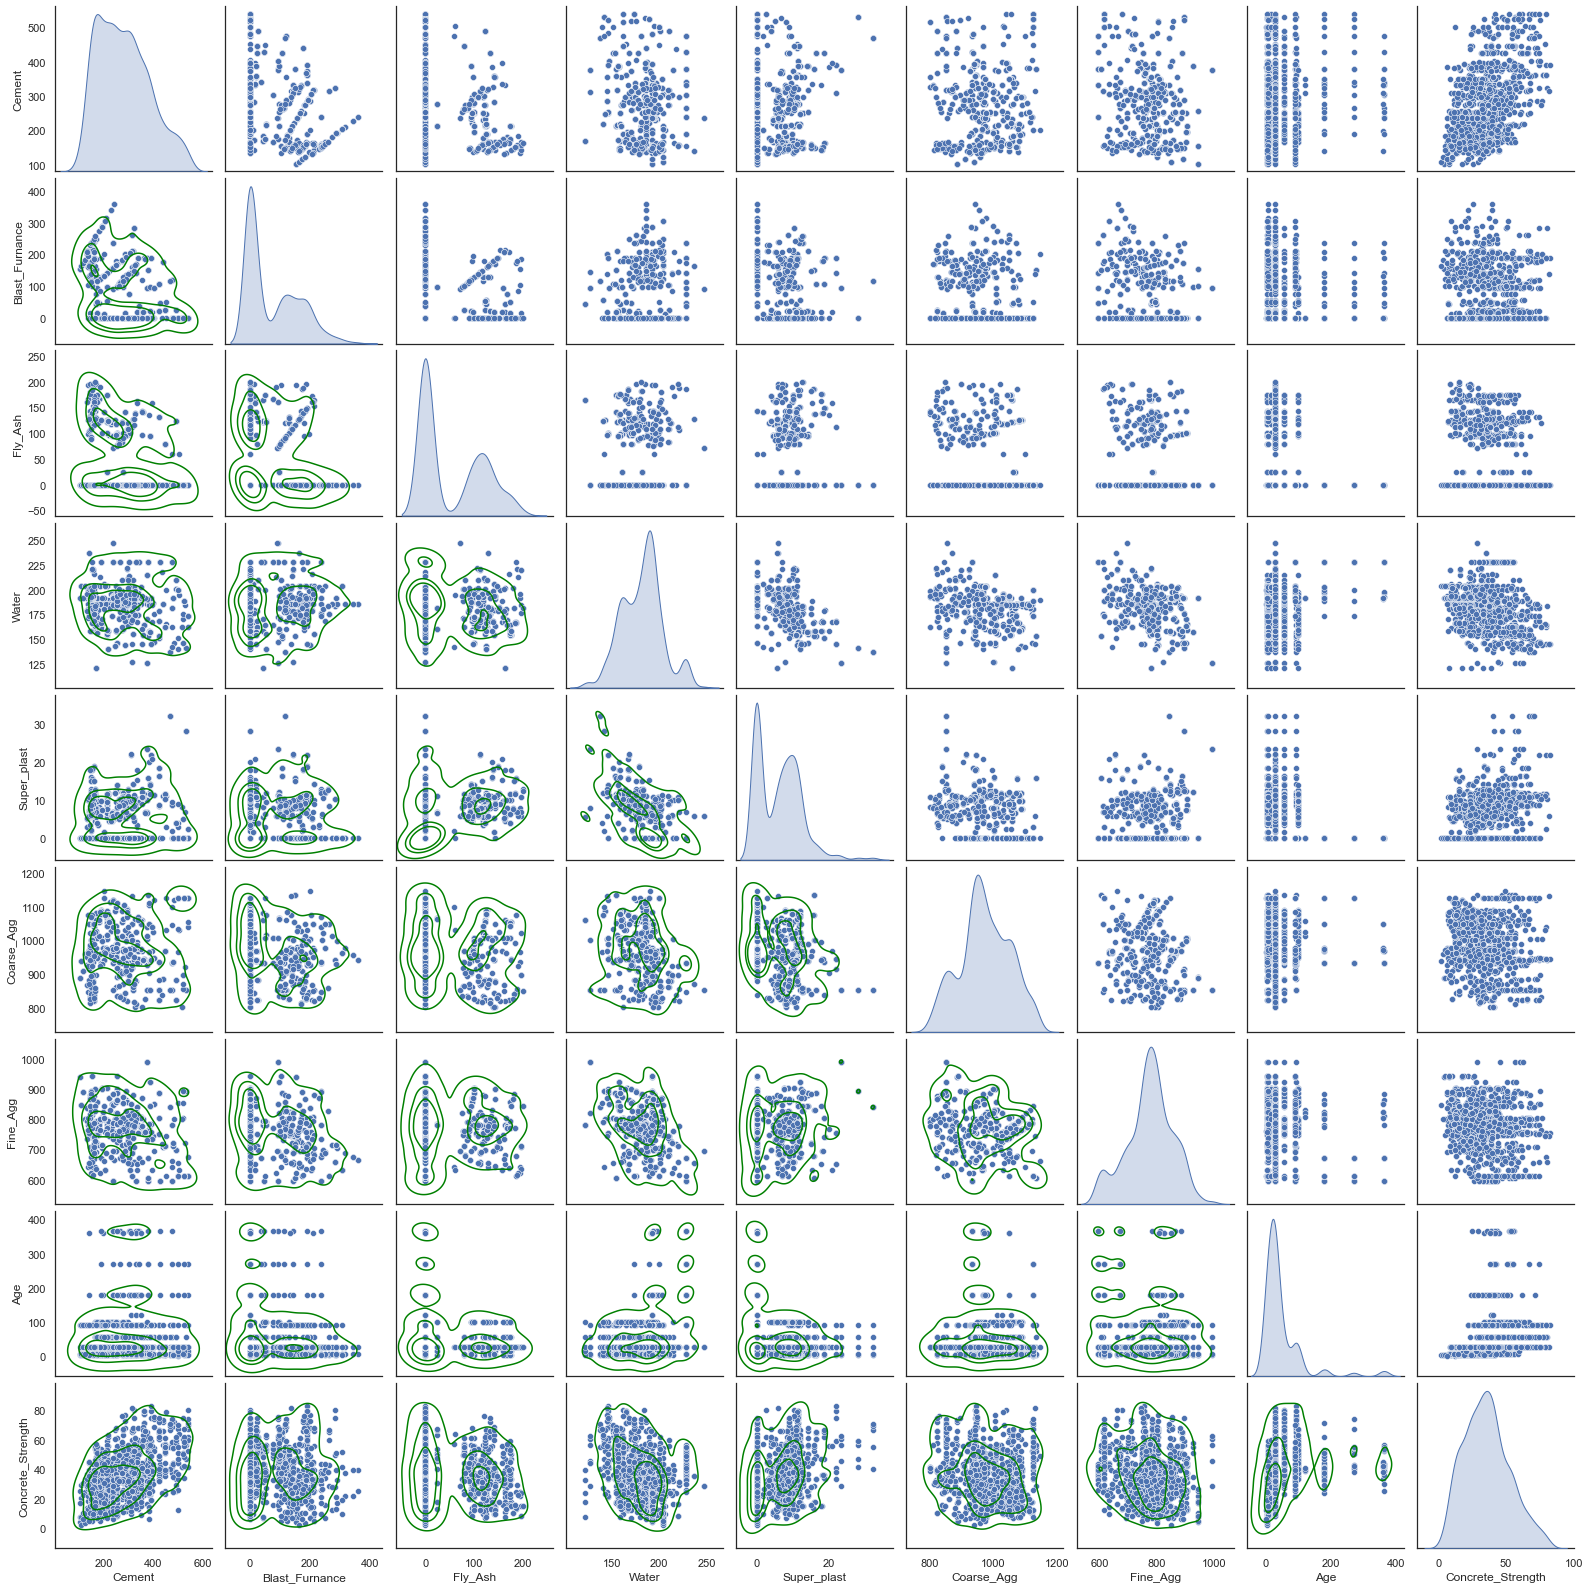

In [14]:
# Using pairplot to view various relationships between our features 
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color="green")

In our pair plot above we notice the cohesive relation between cement and concrete strength in a linear relationship. Concrete strength and superplasticizer somewhat linear. We also notice the positive relationship between superplasticizer and fly ash that seems linear. When we look at the negative relationship like water and superplasticizer the relationship is heading in the opposite direction. They are highly negativitly related.

In [15]:
# copying dataframe before we apply changes to it
df2 = df.copy()

In [16]:
#checking correlation betweeen features
df.corr().T

,Cement,Blast_Furnance,Fly_Ash,Water,Super_plast,Coarse_Agg,Fine_Agg,Age,Concrete_Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnance,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Super_plast,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Agg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Agg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [17]:
corr = df.corr()

In [18]:
# viewing corrolation with out target variable in ascending order
print(corr["Concrete_Strength"].sort_values(ascending=False))

Concrete_Strength    1.000000
Cement               0.497833
Super_plast          0.366102
Age                  0.328877
Blast_Furnance       0.134824
Fly_Ash             -0.105753
Coarse_Agg          -0.164928
Fine_Agg            -0.167249
Water               -0.289613
Name: Concrete_Strength, dtype: float64


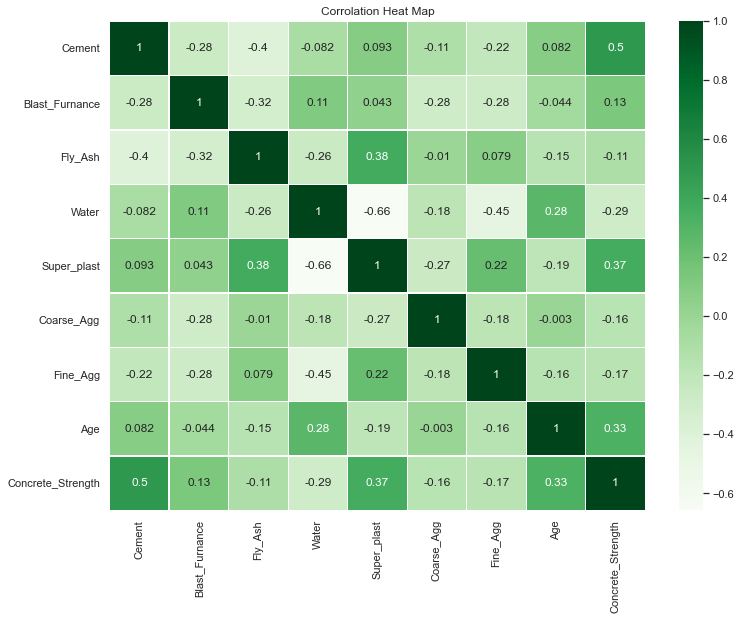

In [19]:
# Lets deploy a correlogram for colrrelation
colormap = plt.cm.Greens
plt.figure(figsize=(12,9))
plt.title("Corrolation Heat Map")
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.2)

Above is our corrolation table. 

We notice concrete, superplasticizer, and age is more corrolated with our target variale(Concrete_Strength) than the rest of our features.

Cement and Concrete_Strength is about 0.5

Superplasticizer and Concrete Strength is about 0.37

Age and Concrete Strength is about 0.33

Features that are highly negativitly corrolated are:

Water and superplasticizer  is about -0.66

Water and Fine Aggergate is about -0.45

Fly Ash and Blast Furnance is about -0.3.2

Flash Ash and Cement is aout 0.-4

# Are there any outliers present, if any what is the appropriarte method to deal with them?

## Detecting outliers

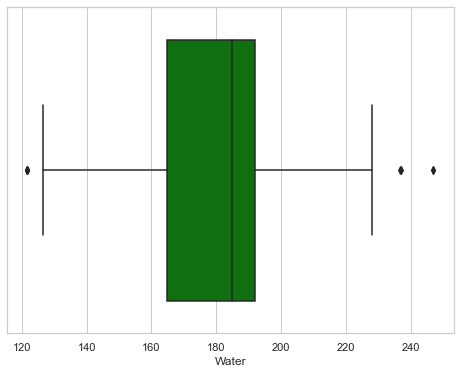

In [20]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Water"], color="green")

Checking the quartiles and comparing the results with the describe function above. The water variable is accurate when we compaire the first and third quartiles then the interquartile range. This also helps us check for outliers in out data. As we will see later.


In [21]:
# Applying Quartiles
from scipy import stats
# calculating the q1 and q3 where q1=.25 and q3=.75
Q1=df["Water"].quantile(q=0.25)
Q3=df["Water"].quantile(q=0.75)

print("1st Quantile (Q1) is: ", Q1)
print("3rd Quartile (Q3 is:", Q3)
print("Interquartile range (IQR) is ", stats.iqr(df["Water"]))

1st Quantile (Q1) is:  164.9
3rd Quartile (Q3 is: 192.0
Interquartile range (IQR) is  27.099999999999994


As we check for outliers in our water variable, the lower outlier limit shows any values below 124.25 is consider a lower outlier and any value above 232.65 is consider an outlier.

In [22]:
# Here we are checking for outliers by setting lower and upper limits any value below or above the limit is outlier
w_lower_outliers=Q1-1.5*(Q3-Q1)
# to find the upper limit threshold for outliers we take q3-1.5std*(q3-q1)
w_upper_outliers=Q3+1.5*(Q3-Q1)
print("The lower outliers in Water: ", w_lower_outliers)
print("The upper outliers in Water: ", w_upper_outliers)

The lower outliers in Water:  124.25000000000001
The upper outliers in Water:  232.64999999999998


In [23]:
# We found the outliers for water where 5 is below lower limit and 4 is above upper limit. 
print("Amount of outliers in Water lower: ", df[df["Water"]<124.25]["Water"].count())
print("Amount of outliers in Water upper: ", df[df["Water"]>232.64]["Water"].count())

Amount of outliers in Water lower:  5
Amount of outliers in Water upper:  4


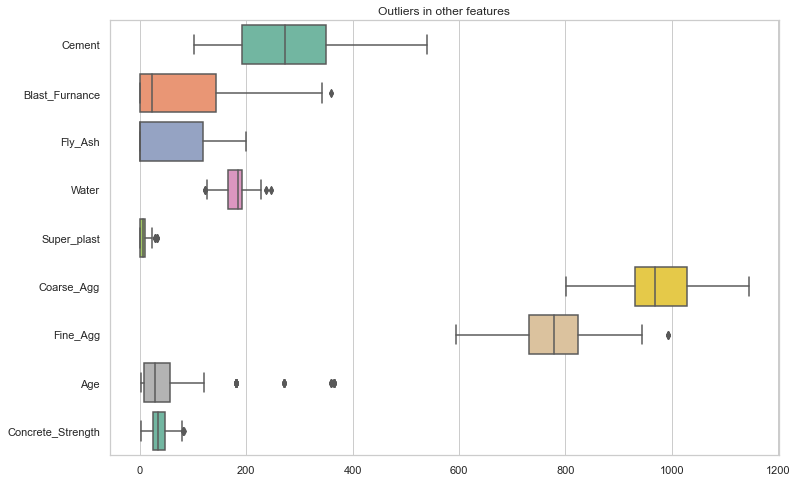

In [24]:
# Lets display a boxplot that helps up detect outliers in our featues
plt.figure(figsize=(12,8))
plt.title("Outliers in other features")
ax = sns.boxplot(data=df, orient="h", palette="Set2")

Text(0.5, 1.0, 'Displaying outliers using regular bolox plot')

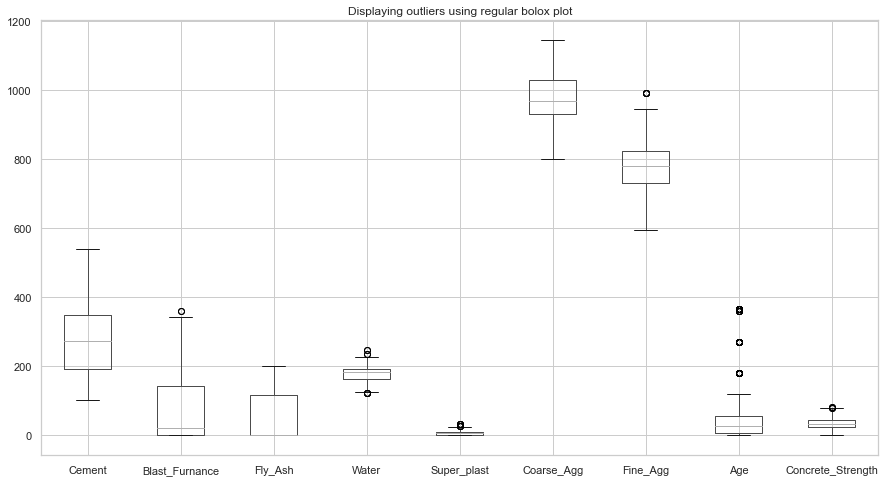

In [25]:
df.boxplot(figsize=(15,8))
plt.title("Displaying outliers using regular bolox plot")

In [26]:
# Displaying all outliers in whole numbers
# any value in water  x- mean_of_feature/std and we want absolute values then check if value > std of 3 is outlier
print("Outliers in Water:", df[((df.Water - df.Water.mean()) / df.Water.std()).abs() >3]["Water"].count())
print("Outliers in Super plast:", df[((df.Super_plast - df.Super_plast.mean()) / df.Super_plast.std()).abs() >3]["Super_plast"].count())
print("Outliers in Concrete Strength:", df[((df.Concrete_Strength - df.Concrete_Strength.mean()) / df.Concrete_Strength.std()).abs() >3]["Concrete_Strength"].count())
print("Outliers in Water:", df[((df.Blast_Furnance - df.Blast_Furnance.mean()) / df.Blast_Furnance.std()).abs() >3]["Blast_Furnance"].count())
print("Outliers in Age:", df[((df.Age - df.Age.mean()) / df.Age.std()).abs() >3]["Age"].count())
print("Outliers in Fine_Agg:", df[((df.Fine_Agg - df.Fine_Agg.mean()) / df.Fine_Agg.std()).abs() >3]["Fine_Agg"].count())

Outliers in Water: 2
Outliers in Super plast: 10
Outliers in Concrete Strength: 0
Outliers in Water: 4
Outliers in Age: 33
Outliers in Fine_Agg: 0


## Replacing outlier with the mean of each column

In [27]:
# we are checking in the columns - the strength(:-1)
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3 - Q1
    
    lower_limit = Q1 -1.5*iqr
    higher_limit = Q3 + 1.5*iqr
    df.loc[(df[cols]< lower_limit) | (df[cols] > higher_limit), cols] =  df[cols].mean()

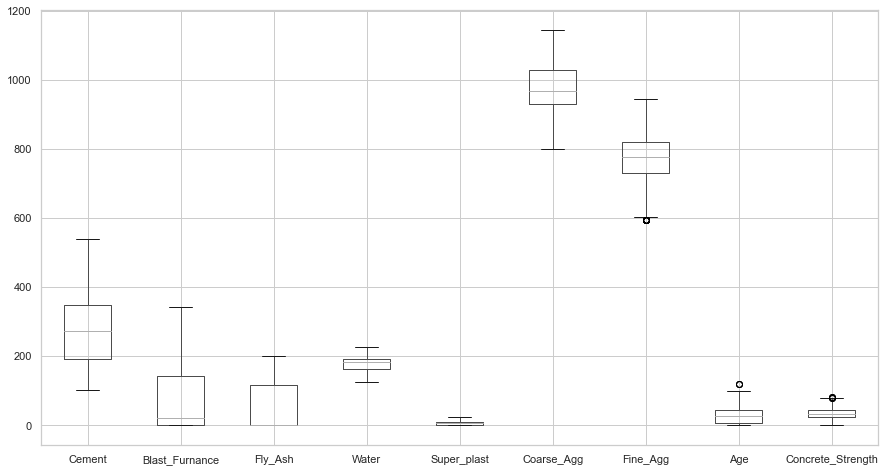

In [28]:
df.boxplot(figsize=(15,8))

In [29]:
from scipy.stats.mstats import winsorize
# we apply one-way winsorization to the highest end of the value distribution.
# As we have a lot of extreme values we set the values of the outliers to the
# value of the 90th percentile
winsorized_fine_Agg = winsorize(df["Fine_Agg"], (0,0.10))
winsorized_Age = winsorize(df["Age"], (0,0.10))
winsorized_Cement_Strength = winsorize(df["Concrete_Strength"], (0,0.10))

## Visualize Winsorized data

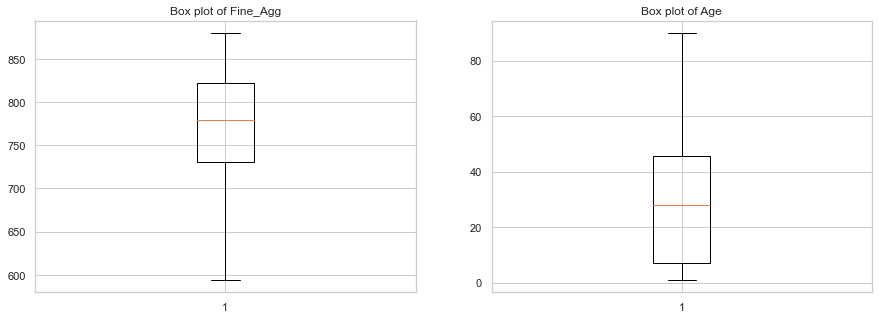

Text(0.5, 1.0, 'Box plot Cement Strength')

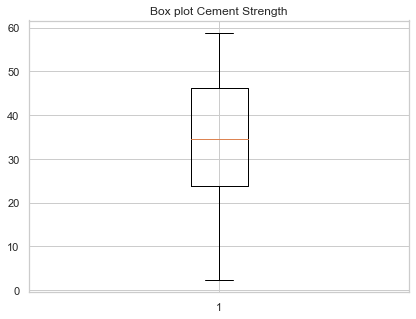

In [30]:
# plotting winsorized variables without outliers
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_fine_Agg, whis = 2.)
plt.title("Box plot of Fine_Agg")

plt.subplot(1,2,2)
plt.boxplot(winsorized_Age, whis = 1.5)
plt.title("Box plot of Age")
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_Cement_Strength, whis = 1.5)
plt.title("Box plot Cement Strength")

In in above winsorized, we've removed a lot of the extreme outliers and made our boxplot more managable.

## Log Transformation of outliers

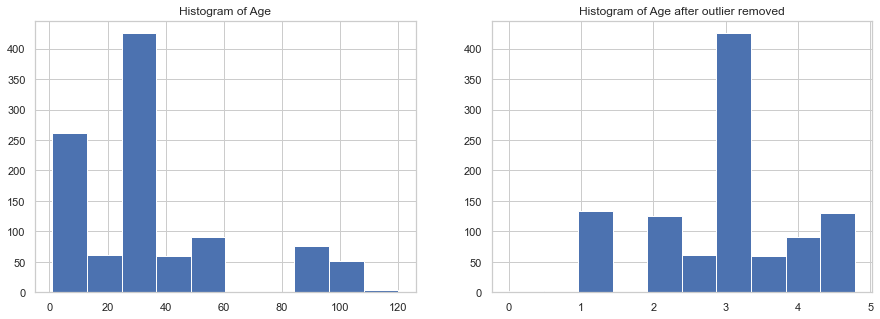

In [31]:
# log transformation histogram of age variable and comparied with previous age histogram
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df["Age"])
plt.title("Histogram of Age")


plt.subplot(1,2,2)
plt.hist(np.log(df["Age"]))
plt.title("Histogram of Age after outlier removed")
plt.show()

In [32]:
# Checking data frame to make sure data is still into place.
df.head()

,Cement,Blast_Furnance,Fly_Ash,Water,Super_plast,Coarse_Agg,Fine_Agg,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,45.662136,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,45.662136,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,45.662136,44.296075


In [33]:
# copying data 
cleaned_df = df.copy()

In [34]:
corr = cleaned_df.corr()
corr

,Cement,Blast_Furnance,Fly_Ash,Water,Super_plast,Coarse_Agg,Fine_Agg,Age,Concrete_Strength
Cement,1.000000,-0.275590,-0.397475,-0.090150,0.013019,-0.109356,-0.239034,-0.014165,0.497833
Blast_Furnance,-0.275590,1.000000,-0.321571,0.099072,0.060105,-0.284457,-0.284191,-0.035367,0.137604
Fly_Ash,-0.397475,-0.321571,1.000000,-0.249929,0.447631,-0.009977,0.092007,0.026939,-0.105753
Water,-0.090150,0.099072,-0.249929,1.000000,-0.657302,-0.156918,-0.424644,0.011072,-0.307034
Super_plast,0.013019,0.060105,0.447631,-0.657302,1.000000,-0.224297,0.154797,0.021988,0.345869
Coarse_Agg,-0.109356,-0.284457,-0.009977,-0.156918,-0.224297,1.000000,-0.160837,0.017591,-0.164928
Fine_Agg,-0.239034,-0.284191,0.092007,-0.424644,0.154797,-0.160837,1.000000,0.020547,-0.182524
Age,-0.014165,-0.035367,0.026939,0.011072,0.021988,0.017591,0.020547,1.000000,0.515304
Concrete_Strength,0.497833,0.137604,-0.105753,-0.307034,0.345869,-0.164928,-0.182524,0.515304,1.000000


In [35]:
print(corr["Concrete_Strength"].sort_values(ascending=False))

Concrete_Strength    1.000000
Age                  0.515304
Cement               0.497833
Super_plast          0.345869
Blast_Furnance       0.137604
Fly_Ash             -0.105753
Coarse_Agg          -0.164928
Fine_Agg            -0.182524
Water               -0.307034
Name: Concrete_Strength, dtype: float64


<Figure size 1080x360 with 0 Axes>

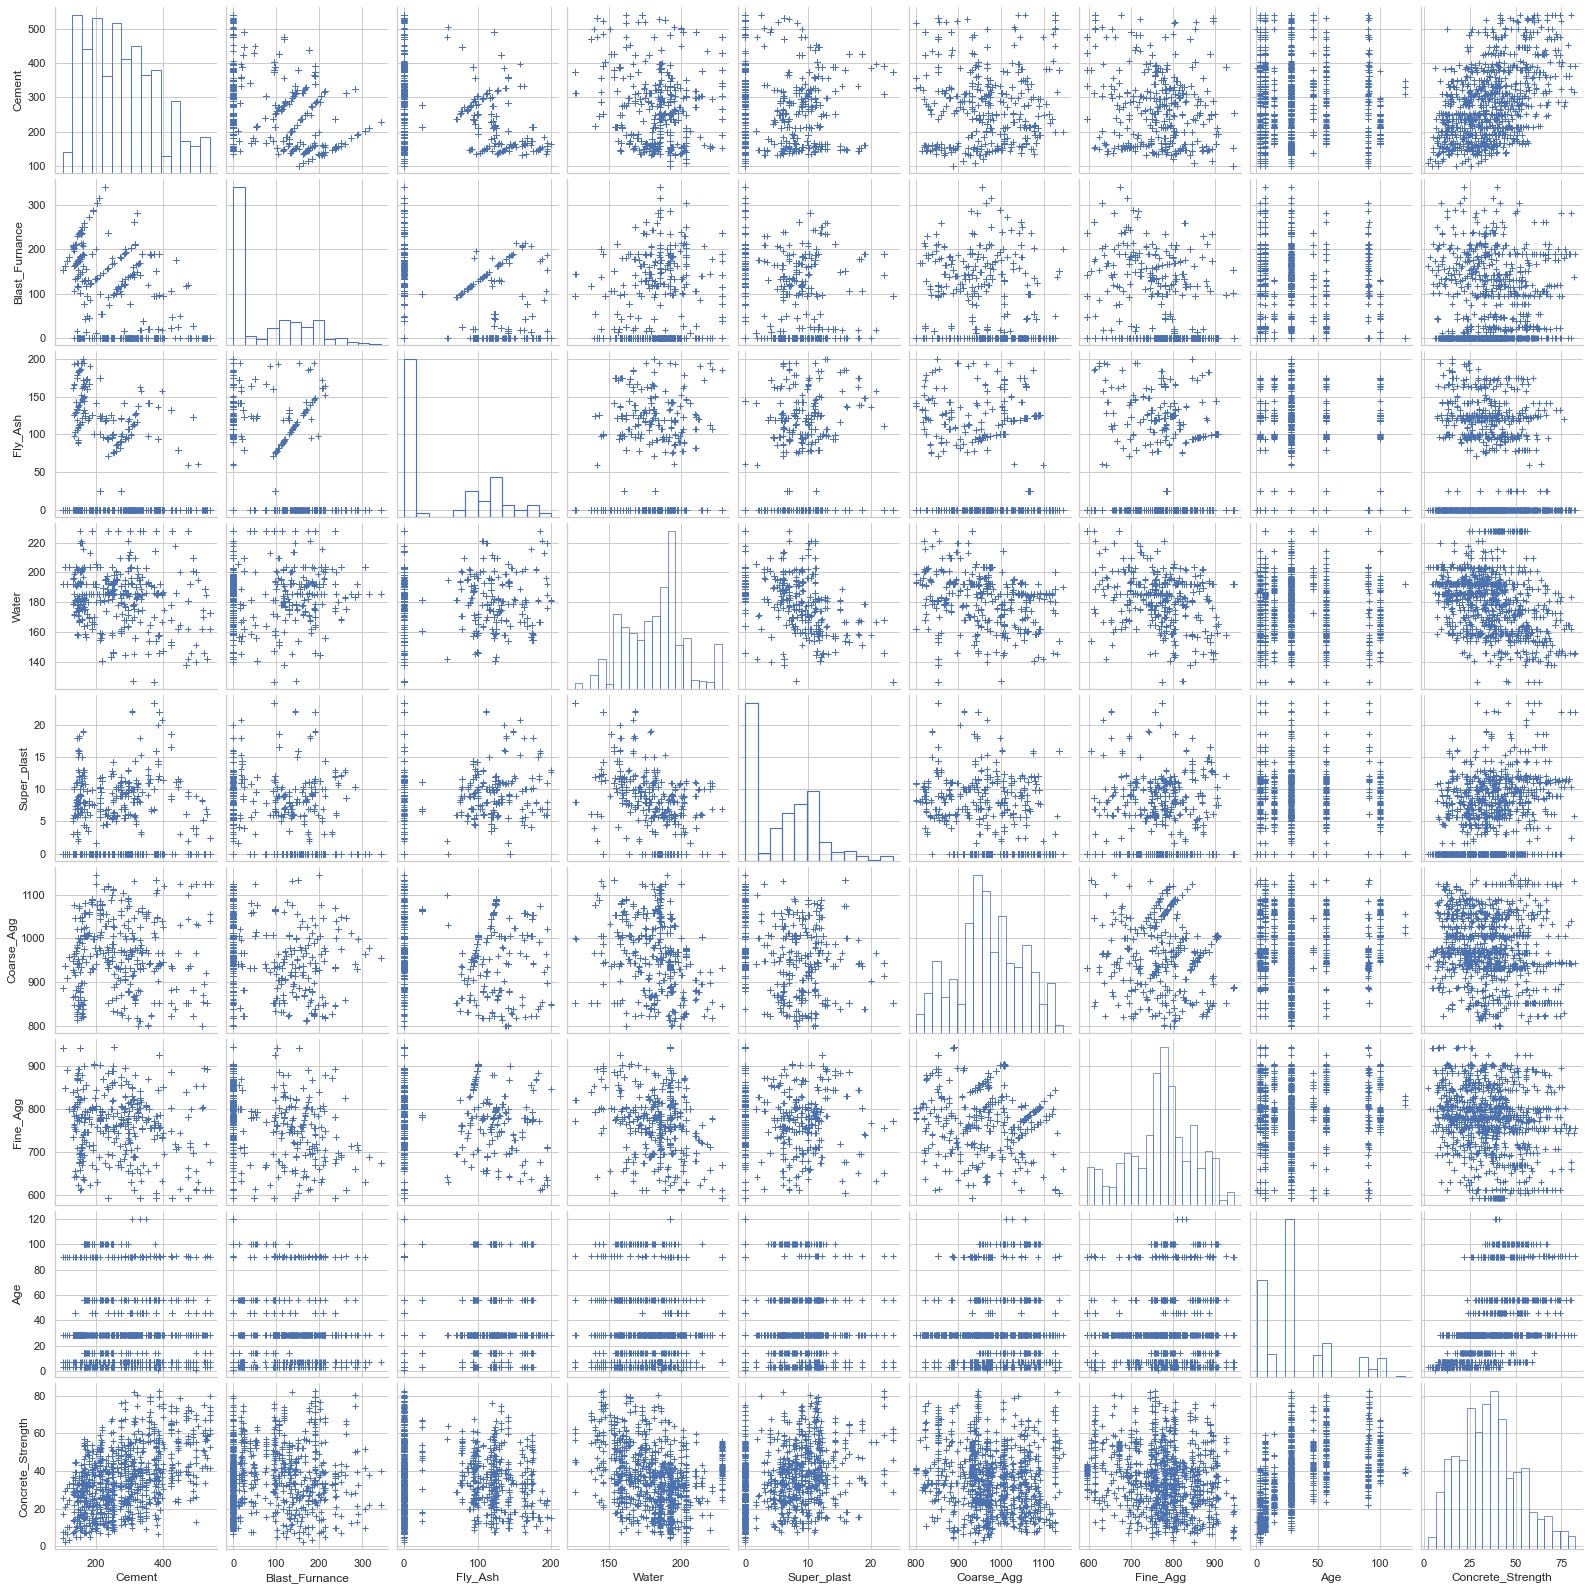

In [36]:
# looking at another pair plot grid after removing outliers
plt.figure(figsize = (15,5))
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

According to our pair grid cement, superplasticizer are linear with concrete strength. Fly Ash and Superplasticiser have a linear relationship as we see their data points moving upwards in that linear directions.

# Which model performs best?

## Feature Engineering and Model Building

In [37]:
#splitting the data into independent and dependent attributes
X =cleaned_df.drop("Concrete_Strength", axis=1)
y =cleaned_df["Concrete_Strength"]

In [38]:
# split train and testing data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# Normalizing the data
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train) 
X_test= st_x.transform(X_test) 

In [41]:
# taking a look to make sure all values are the same 
X_train

array([[ 0.97441045, -0.87395935, -0.82934801, ...,  0.97018036,
        -0.44574212, -0.93045158],
       [ 0.28798149,  0.76379548, -0.82934801, ..., -0.73327353,
         0.37947847, -0.19246793],
       [ 0.28798149, -0.87395935, -0.82934801, ...,  0.52088959,
         0.7095667 ,  1.98634092],
       ...,
       [-1.29461861, -0.87395935,  1.85588823, ..., -0.36485509,
         0.88730652, -0.19246793],
       [-0.38319349, -0.02646153, -0.82934801, ..., -0.38282672,
        -1.39411101, -0.19246793],
       [-0.8369993 ,  2.42907561, -0.82934801, ..., -0.5343019 ,
        -0.73647368,  1.98634092]])

In [42]:
# looking at our target values
y_train

772    24.000660
997    45.304778
724    35.763120
167    74.194512
764    14.699628
         ...    
277    36.969703
763     6.267337
835    15.416683
559    39.435269
684    50.732334
Name: Concrete_Strength, Length: 721, dtype: float64

In [89]:
# importing libraries for models and scores
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Linear Regression 

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lin_reg.predict(X_test)

In [47]:
#training results
lin_reg.score(X_train, y_train)

0.745675442243757

In [48]:
#testing results
lin_reg.score(X_test,y_test)

0.728353299090944

In [49]:
lin_r2 = metrics.r2_score(y_test,y_pred)
lin_r2

0.728353299090944

In [53]:
lin_acc = cross_val_score(lin_reg, X_train, y_train, cv = 10)
print(lin_acc)#get the mean of each fold 
print("Accuracy of Linear Regression with Cross Validation is:",lin_acc.mean() * 100)

[0.69111423 0.74747242 0.77698347 0.70781088 0.76322265 0.73002119
 0.61131474 0.79359563 0.70559005 0.79660435]
Accuracy of Linear Regression with Cross Validation is: 73.23729622462089


The linear model above scored about 73% which is ok lets look at how the other moels perform.

## Decision Tree Regressor

In [55]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
y_pred = d_tree.predict(X_test)

In [57]:
# training results
d_tree.score(X_train, y_train)

0.9957441675316695

In [58]:
# testing results
d_tree.score(X_test, y_test)

0.8050596766354943

In [59]:
#R2 score. 
d_tree_r2 = metrics.r2_score(y_test,y_pred)
d_tree_r2

0.8050596766354943

In [60]:
dt_acc = cross_val_score(lin_reg, X_train, y_train, cv = 10)
print(dt_acc)#get the mean of each fold 
print("Accuracy of Decision Tree with Cross Validation is:",dt_acc.mean() * 100)

[0.69111423 0.74747242 0.77698347 0.70781088 0.76322265 0.73002119
 0.61131474 0.79359563 0.70559005 0.79660435]
Accuracy of Decision Tree with Cross Validation is: 73.23729622462089


Our decision trees looks to be fitting by scoring perfect in our training data. It most likely captured the noise of the data because it fit the train model too well. The testing scores 81%  and our cross validation average of ten folds is 73% which is about the same as the Linear Regression.

# Tuning Decision Tree

## Random Forest Regressor

In [66]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
y_pred = rand_forest.predict(X_test)

In [68]:
rand_forest.score(X_train,y_train)

0.9836425699952521

In [69]:
rand_forest.score(X_test,y_test)

0.892152338495128

In [71]:
rdf_acc = cross_val_score(rand_forest, X_train, y_train, cv = 10)
print(rdf_acc)#get the mean of each fold 
print("Accuracy of Random Forest with Cross Validation is:",rdf_acc.mean() * 100)

[0.93584645 0.90336348 0.92546373 0.88996981 0.87732139 0.85667826
 0.8547633  0.93743487 0.91747356 0.90190052]
Accuracy of Random Forest with Cross Validation is: 90.00215378679046


In our random forest we notice our model is overfitting in our predictions, perhaps random forest is too complex for our data, perhaps it fits the data too well and it captured the noise of the data. but we will tune the hyperparamaters.

## Gradient Boosting Regressor

In [72]:
g_boost = GradientBoostingRegressor()
g_boost.fit(X_train, y_train)

GradientBoostingRegressor()

In [73]:
gb_pred = g_boost.predict(X_test)

In [74]:
g_boost.score(X_train, y_train)

0.9486695843158858

In [75]:
g_boost.score(X_test, y_test)

0.8942699576607143

In [76]:
gboost_acc = cross_val_score(g_boost, X_train, y_train, cv = 10)
print(gboost_acc)#get the mean of each fold 
print("Accuracy of Gradient Boosting with Cross Validation is:",gboost_acc.mean() * 100)

[0.92697703 0.88770387 0.90602308 0.90505677 0.89247339 0.8840637
 0.89108275 0.92024895 0.88588351 0.89389115]
Accuracy of Gradient Boosting with Cross Validation is: 89.93404197117518


Here in our Gradient Boosting model it has a strong score of 89%. It has the best of the first two models thus far.

## Support Vector Regressor

In [78]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [79]:
svm_pred = svm_reg.predict(X_test)

In [80]:
svm_reg.score(X_train, y_train)

0.741625182908408

In [81]:
svm_reg.score(X_test, y_test)

0.7241157703117796

In [82]:
svr_acc = cross_val_score(svm_reg, X_train, y_train, cv = 10)
print(svr_acc)#get the mean of each fold 
print("Accuracy of Support Vector with Cross Validation is:",svr_acc.mean() * 100)

[0.69292382 0.75251764 0.76743908 0.70214913 0.76851784 0.72157502
 0.59469263 0.78932513 0.71674448 0.78136152]
Accuracy of Support Vector with Cross Validation is: 72.87246297113428


Above the Support Vector Regressor scored about 73% which is the same as the Linear Regression model. SVM is not overfitting. It works best on smaller datasets such as our concrete data. 

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparamater Tuning

## Decision Tree Randomized Search

In [139]:
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
dt_random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(dt_random_grid)

{'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [140]:
dt_random = RandomizedSearchCV(estimator = d_tree,

param_distributions = dt_random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [141]:
# Fit the random search model
dt_random.fit(X_train, y_train.values.ravel());

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished


In [144]:
# best ensemble model (with optimal combination of hyperparameters)
dtTree = dt_random.best_estimator_
dtTree.fit(X_train, y_train.values.ravel())
print('Decision Tree Regressor')
dtTree_train_score = dtTree.score(X_train, y_train)
print("Decision Tree Regressor Model Training Set Score:",dtTree_train_score)

dtTree_score = dtTree.score(X_test, y_test)
print("Decision Tree Regressor Model Validation Set Score:",dtTree_score)

dtTree_rmse = np.sqrt((-1) * cross_val_score(dtTree, X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error').mean())
print("Decision Tree Regressor Model RMSE :", dtTree_rmse)

dtTree_r2 = cross_val_score(dtTree, X_train, y_train.values.ravel(), cv=10, scoring='r2').mean()
print("Decision Tree Regressor Model R-Square Value :", dtTree_r2)

Decision Tree Regressor
Decision Tree Regressor Model Training Set Score: 0.9502089081701337
Decision Tree Regressor Model Validation Set Score: 0.7737797783390656
Decision Tree Regressor Model RMSE : 7.48874987837446
Decision Tree Regressor Model R-Square Value : 0.7949209814539778


As we tune our decision tree model we notice training set scores 95% and our validation(test set) scored only 77% our model must be overfitting. It could need more possible tuning. 

# RandomForest Randomized Search

In [145]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [146]:
rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 10, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [148]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)

rfTree_score = rfTree.score(X_test, y_test)
print("Random Forest Regressor Model Validation Set Score:",rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=10, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)


Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9384389501154466
Random Forest Regressor Model Validation Set Score: 0.8756601091441877
Random Forest Regressor Model RMSE : 6.180647044810911
Random Forest Regressor Model R-Square Value : 0.8672046815922423


After tuning our random forest model we see that the score is very much consistant around low 90 percent and higher 80s this is good. Our root mean squared error is 6 that means we are 6% off when we predicted from the actual value.

# Gradient Boosting Randomized Search

In [149]:
loss = ['ls', 'lad', 'huber']
n_estimators = [10, 20]
max_depth = [2, 3, ]
min_samples_leaf = [1, 2] 
min_samples_split = [2, 4]
max_features = ['auto', 'sqrt']

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=g_boost,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [150]:
# Fit the random search model
random_cv.fit(X_train, y_train.values.ravel());

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 152 out of 200 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.7s finished


In [151]:
# best ensemble model (with optimal combination of hyperparameters)
gboost = random_cv.best_estimator_
gboost.fit(X_train, y_train.values.ravel())
print('Gradient Boosting Regressor')
gboost_train_score = gboost.score(X_train, y_train)
print("Gradient Boosting Regressor Model Training Set Score:",gboost_train_score)

gboost_score = gboost.score(X_test, y_test)
print("Gradient Boosting Regressor Model Validation Set Score:",gboost_score)

gboost_rmse = np.sqrt((-1) * cross_val_score(gboost, X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", gboost_rmse)

gboost_r2 = cross_val_score(gboost, X_train, y_train.values.ravel(), cv=10, scoring='r2').mean()
print("Gradient Boosting Regressor Model R-Square Value :", gboost_r2)

gboost_random_model_df = pd.DataFrame({'Trainng Score': [gboost_train_score],
                           'Validation Score': [gboost_score],
                           'RMSE': [gboost_rmse],
                           'R Squared': [gboost_r2]})

Gradient Boosting Regressor
Gradient Boosting Regressor Model Training Set Score: 0.8018861767691232
Gradient Boosting Regressor Model Validation Set Score: 0.7764147934945784
Random Forest Regressor Model RMSE : 8.208026381658227
Gradient Boosting Regressor Model R-Square Value : 0.7622291674990633


The Gradient Boosting scored average as the other models. We notice the RMSE is 8% and the R-squared value is 76%

# Performance from all models

In [157]:
# preparing accuracies for our performance graph
lin_acc = lin_reg.score(X_test, y_test)
dt_acc = d_tree.score(X_test, y_test)
rdf_acc = rand_forest.score(X_test,y_test)
svr_acc = svm_reg.score(X_test, y_test) 
gboost_acc = g_boost.score(X_test, y_test)

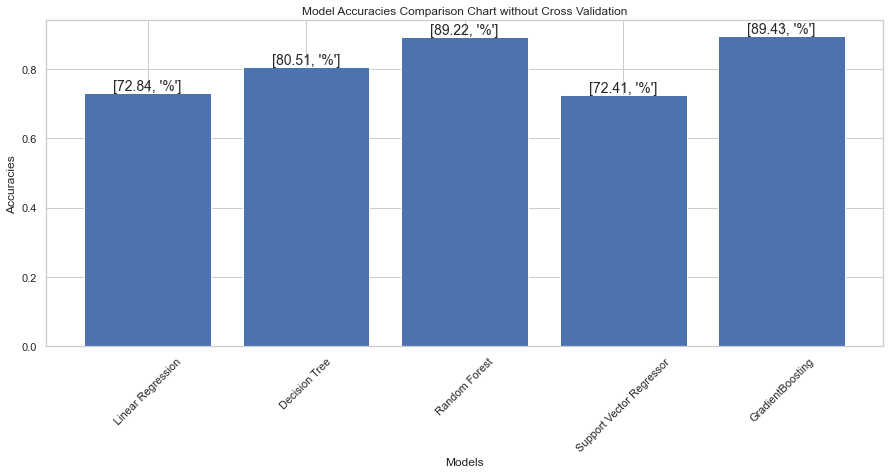

In [161]:
# Visualizing Model Accuracies

fig, ax = plt.subplots(figsize=(15,6))

models = ["Linear Regression", "Decision Tree", "Random Forest","Support Vector Regressor", "GradientBoosting"]
accuracies = [lin_acc, dt_acc, rdf_acc, svr_acc, gboost_acc]
ax.bar(models, accuracies)
plt.xticks(rotation=45)
plt.title("Model Accuracies Comparison Chart without Cross Validation")
plt.xlabel("Models")
plt.ylabel("Accuracies")
for i in range(len(models)):
    ax.text(i, accuracies[i], [(accuracies[i]*100).round(2), "%"], ha="center", va="bottom")
plt.rcParams.update({'font.size': 14})
plt.show()

# Solution ::

- We may infer from the foregoing that Gradient boosting and Random Forest Regressor provides an excellent accuracy score.
-  Using validation data, and the results using and Gradient Boosting and RandomForestRegressor were likewise superior than the rest of the models
- So we can estimate the strength of high performance concrete using the Gradient Boosting and Random Forest Regressor. However, when we compaire our top two models we notice Gradient Boosting performed 0.21% better than Random Forest. Gradient Boosting with a score of 89.43% is the favor of the models.

- This data provides valuable insights for concrete companies who are interesting in testing the quality(strength) of concrete, moreover we notice that Age, Cement, and Superplastizer plays a significant row in aiding the strength of concrete. When mixing ingrentients for concrete apply more cement and superplasticizer and continue to test at that 28 days to 35 days mark.